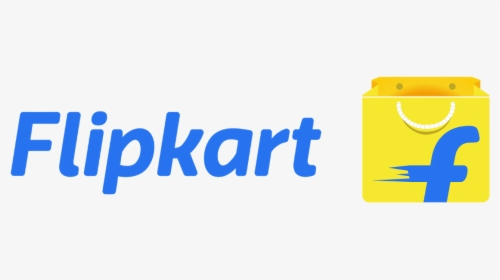

# **Project Title - Flipkart Mobile and Laptop data analysis**
The data used in this analysis was flipkart sales data of all the mobile brands
and Laptop brands which there is detailed about the  brand, color, selling price, original price,memory, storage etc, this data I have extracted using BeautifulSoup from Flipkart.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

# Get the Scrapped Dataset


In [17]:
mobile_df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FlipkartEDA-2/MobilesDataSet.csv')
Laptop_df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FlipkartEDA-2/LaptopDataSet.csv')

In [ ]:
mobile_df

,Unnamed: 0,Brand,Model,Processor,Ram,Camera,Battery,Display,OrginalPrice,Discount,Price,Rating,Warranty
0,0,REDMI,"9i Sport (Coral Green, 64 GB)",MediaTek Helio G25 Processor,4 GB RAM,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,16.59 cm (6.53 inch) HD+ Display,"₹9,999",10% off,"₹8,999",4.4,Brand Warranty of 1 Year Available for Mobile ...
1,1,realme,"Narzo 50A (Oxygen Green, 64 GB)",MediaTek Helio G85 Processor,4 GB RAM,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,16.51 cm (6.5 inch) HD+ Display,"₹12,999",11% off,"₹11,549",4.4,1 Year Warranty for Mobile and 6 Months for Ac...
2,2,realme,"Narzo 50A (Oxygen Blue, 64 GB)",MediaTek Helio G85 Processor,4 GB RAM,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,16.51 cm (6.5 inch) HD+ Display,"₹12,999",11% off,"₹11,549",4.4,1 Year Warranty for Mobile and 6 Months for Ac...
3,3,REDMI,"9i Sport (Carbon Black, 64 GB)",MediaTek Helio G25 Processor,4 GB RAM,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,16.59 cm (6.53 inch) HD+ Display,"₹9,999",10% off,"₹8,999",4.4,Brand Warranty of 1 Year Available for Mobile ...
4,4,REDMI,"9i Sport (Metallic Blue, 64 GB)",MediaTek Helio G25 Processor,4 GB RAM,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,16.59 cm (6.53 inch) HD+ Display,"₹9,999",10% off,"₹8,999",4.4,Brand Warranty of 1 Year Available for Mobile ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,835,Snexian,Guru 605,Company Service Center Warranty,32 MB RAM,0.3MP Rear Camera,1050 mAh Battery,4.57 cm (1.8 inch) Display,NaN,NaN,₹699,3.6,Company Service Center Warranty
836,836,KARBONN,k24+,1 Year Brand Warranty,32 MB RAM,0.3MP Rear Camera,1800 mAh Battery,6.1 cm (2.4 inch) Quarter QVGA Display,"₹1,145",NaN,"₹1,143",3.9,1 Year Brand Warranty
837,837,KARBONN,K2 Boom Box,1 Year Brand Warranty on Handset,32 MB RAM,0.3MP Rear Camera,1000 mAh Battery,4.57 cm (1.8 inch) Display,NaN,NaN,"₹1,088",3.9,1 Year Brand Warranty on Handset
838,838,vivo,"V21 5G (Neon Spark, 128 GB)",Mediatek Dimensity 800U Processor,8 GB RAM,64MP + 8MP + 2MP | 44MP Front Camera,4000 mAh Lithium-ion Battery,16.36 cm (6.44 inch) Full HD+ Display,NaN,NaN,"₹32,990",4.3,1 Year for Handset and 6 Months for Accessories


In [18]:
Laptop_df

,Unnamed: 0,Brand,Model,Processor,Ram,OS,Storage,OrginalPrice,Discount,Price,Rating
0,0,['Nokia'],Nokia PureBook S14 Core i5 10th Gen - (8 GB/51...,['Intel Core i5 Processor'],['8 GB DDR4 RAM'],['64 bit Windows 10 Operating System'],['512 GB SSD'],"₹74,990",32% off,"₹50,990",5.0
1,1,['Nokia'],Nokia PureBook S14 Core i5 11th Gen - (8 GB/51...,['Intel Core i5 Processor'],['8 GB DDR4 RAM'],['64 bit Windows 11 Operating System'],['512 GB SSD'],"₹82,990",36% off,"₹52,790",NaN
2,2,['DELL'],DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,['AMD Athlon Dual Core Processor'],['4 GB DDR4 RAM'],['64 bit Windows 11 Operating System'],['256 GB SSD'],"₹42,210",29% off,"₹29,890",4.2
3,3,['Lenovo'],Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,['Intel Core i3 Processor'],['8 GB DDR4 RAM'],['64 bit Windows 11 Operating System'],['512 GB SSD'],"₹64,490",35% off,"₹41,490",4.2
4,4,['HP'],HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,['Intel Core i3 Processor'],['8 GB DDR4 RAM'],['64 bit Windows 11 Operating System'],['512 GB SSD'],"₹49,590",11% off,"₹43,990",4.5
...,...,...,...,...,...,...,...,...,...,...,...
849,849,['HP'],HP 15 Core i5 8th Gen - (8 GB/1 TB HDD/DOS/2 G...,['Intel Core i5 Processor'],['8 GB DDR4 RAM'],NaN,['1 TB HDD'],NaN,NaN,"₹55,729",4.2
850,850,['Lenovo'],Lenovo v15 Core i3 10th Gen - (4 GB/1 TB HDD/D...,['Intel Core i3 Processor'],['4 GB DDR4 RAM'],['64 bit DOS Operating System'],['1 TB HDD'],"₹43,999",9% off,"₹39,999",3.1
851,851,['MSI'],MSI Bravo Ryzen 5 Hexa Core 5600H - (8 GB/512 ...,['AMD Ryzen 5 Hexa Core Processor'],['8 GB DDR4 RAM'],['64 bit Windows 10 Operating System'],['512 GB SSD'],"₹83,990",22% off,"₹64,990",4.6
852,852,['ASUS'],ASUS Vivobook 15 Core i3 11th Gen - (8 GB/1 TB...,['Intel Core i3 Processor'],['8 GB DDR4 RAM'],['64 bit Windows 10 Operating System'],['1 TB HDD'],"₹51,990",17% off,"₹42,800",2.8


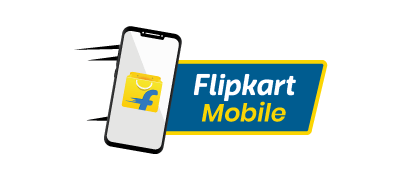

# ***MOBILE DATA***

In [45]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    840 non-null    int64  
 1   Brand         840 non-null    object 
 2   Model         840 non-null    object 
 3   Processor     789 non-null    object 
 4   Ram           840 non-null    object 
 5   Camera        840 non-null    object 
 6   Battery       840 non-null    object 
 7   Display       840 non-null    object 
 8   OrginalPrice  543 non-null    object 
 9   Discount      493 non-null    object 
 10  Price         840 non-null    object 
 11  Rating        824 non-null    float64
 12  Warranty      840 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 85.4+ KB


## Data Cleaning

In [46]:
mobile_df.isnull().sum()

Unnamed: 0        0
Brand             0
Model             0
Processor        51
Ram               0
Camera            0
Battery           0
Display           0
OrginalPrice    297
Discount        347
Price             0
Rating           16
Warranty          0
dtype: int64

In [47]:
del mobile_df['Unnamed: 0']
mobile_df.head()

,Brand,Model,Processor,Ram,Camera,Battery,Display,OrginalPrice,Discount,Price,Rating,Warranty
0,REDMI,"9i Sport (Coral Green, 64 GB)",MediaTek Helio G25 Processor,4 GB RAM,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,16.59 cm (6.53 inch) HD+ Display,"₹9,999",10% off,"₹8,999",4.4,Brand Warranty of 1 Year Available for Mobile ...
1,realme,"Narzo 50A (Oxygen Green, 64 GB)",MediaTek Helio G85 Processor,4 GB RAM,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,16.51 cm (6.5 inch) HD+ Display,"₹12,999",11% off,"₹11,549",4.4,1 Year Warranty for Mobile and 6 Months for Ac...
2,realme,"Narzo 50A (Oxygen Blue, 64 GB)",MediaTek Helio G85 Processor,4 GB RAM,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,16.51 cm (6.5 inch) HD+ Display,"₹12,999",11% off,"₹11,549",4.4,1 Year Warranty for Mobile and 6 Months for Ac...
3,REDMI,"9i Sport (Carbon Black, 64 GB)",MediaTek Helio G25 Processor,4 GB RAM,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,16.59 cm (6.53 inch) HD+ Display,"₹9,999",10% off,"₹8,999",4.4,Brand Warranty of 1 Year Available for Mobile ...
4,REDMI,"9i Sport (Metallic Blue, 64 GB)",MediaTek Helio G25 Processor,4 GB RAM,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,16.59 cm (6.53 inch) HD+ Display,"₹9,999",10% off,"₹8,999",4.4,Brand Warranty of 1 Year Available for Mobile ...


In [48]:
#Removing ₹ from originalPrice, discountedPrice
mobile_df['OrginalPrice'] = pd.to_numeric(mobile_df['OrginalPrice'].replace('[^0-9\.-]', "", regex=True))
mobile_df['Price'] = pd.to_numeric(mobile_df['Price'].replace('[^0-9\.-]', "", regex=True))
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         840 non-null    object 
 1   Model         840 non-null    object 
 2   Processor     789 non-null    object 
 3   Ram           840 non-null    object 
 4   Camera        840 non-null    object 
 5   Battery       840 non-null    object 
 6   Display       840 non-null    object 
 7   OrginalPrice  543 non-null    float64
 8   Discount      493 non-null    object 
 9   Price         840 non-null    int64  
 10  Rating        824 non-null    float64
 11  Warranty      840 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 78.9+ KB


In [49]:
mobile_df['Discount'] = pd.to_numeric(mobile_df['Discount'].replace("[^0-9]", "", regex=True))
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         840 non-null    object 
 1   Model         840 non-null    object 
 2   Processor     789 non-null    object 
 3   Ram           840 non-null    object 
 4   Camera        840 non-null    object 
 5   Battery       840 non-null    object 
 6   Display       840 non-null    object 
 7   OrginalPrice  543 non-null    float64
 8   Discount      493 non-null    float64
 9   Price         840 non-null    int64  
 10  Rating        824 non-null    float64
 11  Warranty      840 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 78.9+ KB


In [50]:
mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OrginalPrice,543.0,14586.176796,14585.151741,749.0,1849.0,12459.0,18999.00,95999.0
Discount,493.0,10.829615,6.752851,1.0,6.0,10.0,15.00,44.0
Price,840.0,11316.929762,13683.870448,699.0,1297.0,8499.0,15836.75,149900.0
Rating,824.0,4.142354,0.268319,2.3,4.0,4.2,4.30,5.0


In [51]:
mobile_df.head()

,Brand,Model,Processor,Ram,Camera,Battery,Display,OrginalPrice,Discount,Price,Rating,Warranty
0,REDMI,"9i Sport (Coral Green, 64 GB)",MediaTek Helio G25 Processor,4 GB RAM,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,16.59 cm (6.53 inch) HD+ Display,9999.0,10.0,8999,4.4,Brand Warranty of 1 Year Available for Mobile ...
1,realme,"Narzo 50A (Oxygen Green, 64 GB)",MediaTek Helio G85 Processor,4 GB RAM,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,16.51 cm (6.5 inch) HD+ Display,12999.0,11.0,11549,4.4,1 Year Warranty for Mobile and 6 Months for Ac...
2,realme,"Narzo 50A (Oxygen Blue, 64 GB)",MediaTek Helio G85 Processor,4 GB RAM,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,16.51 cm (6.5 inch) HD+ Display,12999.0,11.0,11549,4.4,1 Year Warranty for Mobile and 6 Months for Ac...
3,REDMI,"9i Sport (Carbon Black, 64 GB)",MediaTek Helio G25 Processor,4 GB RAM,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,16.59 cm (6.53 inch) HD+ Display,9999.0,10.0,8999,4.4,Brand Warranty of 1 Year Available for Mobile ...
4,REDMI,"9i Sport (Metallic Blue, 64 GB)",MediaTek Helio G25 Processor,4 GB RAM,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,16.59 cm (6.53 inch) HD+ Display,9999.0,10.0,8999,4.4,Brand Warranty of 1 Year Available for Mobile ...


In [52]:
mobile_df.sample(10)

,Brand,Model,Processor,Ram,Camera,Battery,Display,OrginalPrice,Discount,Price,Rating,Warranty
455,Itel,U20,SC6531E Processor,4 MB RAM,0.3MP Rear Camera,1000 mAh Lithium-ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,NaN,NaN,999,3.9,100 Days Replacement and 1 Year Manufacturer W...
808,Infocus,Power 1,No Processor,32 MB RAM,0.3MP + 0MP,2500 mAh Battery,4.5 cm (1.77 inch) NA Display,NaN,NaN,1140,4.0,"Beyond 120 days, the normal repair warranty te..."
827,Grabo,ECO 1.8,NaN,64 MB RAM,1100 mAh Battery,6 Months Manufacturer Warranty for Device,4.57 cm (1.8 inch) Quarter QVGA Display,759.0,5.0,719,3.7,6 Months Manufacturer Warranty for Device
71,OPPO,"A33 (Moonlight Black, 32 GB)",Qualcomm Snapdragon 460 Processor,3 GB RAM,13MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Polymer Battery,16.51 cm (6.5 inch) HD+ Display,12990.0,19.0,10490,4.3,Brand Warranty of 1 Year Available for Mobile ...
408,SAMSUNG,"Galaxy A72 (Awesome Violet, 128 GB)",Qualcomm Snapdragon 720G Processor,8 GB RAM,64MP + 12MP + 8MP + 5MP | 32MP Front Camera,5000 mAh Lithium-ion Battery,17.02 cm (6.7 inch) Full HD+ Display,NaN,NaN,35499,4.3,1 Year Warranty Provided by the Manufacturer f...
566,MTR,Ferrari,12 Months,64 MB RAM,0.3MP Rear Camera,800 mAh Battery,4.5 cm (1.77 inch) Display,1330.0,1.0,1310,4.1,12 Months
415,REDMI,"NOTE 10 LITE (Champagne Gold, 128 GB)",1 Year Manufacturer Warranty,4 GB RAM,48MP Rear Camera,5020 mAh Battery,16.94 cm (6.67 inch) Display,NaN,NaN,14990,4.3,1 Year Manufacturer Warranty
681,anee,P4,12 Months Warranty,32 MB RAM,0.3MP Rear Camera,2750 mAh Battery,4.57 cm (1.8 inch) Display,NaN,NaN,790,3.7,12 Months Warranty
781,Itel,Muzik 400 Core,SC6531E Processor,4 MB RAM,0.3MP Rear Camera,1900 mAh Lithium-ion Battery,6.1 cm (2.4 inch) Display,1385.0,8.0,1269,4.1,1 Year Manufacturer Warranty for Device and 6 ...
309,Kechaoda,A26,NaN,32 MB RAM,800 mAh Battery,1 Year Company Warranty,1.68 cm (0.66 inch) Display,990.0,4.0,949,4.1,1 Year Company Warranty


In [53]:
# Most Sold Brand
mobile_df['Brand'].groupby(mobile_df['Brand']).count().sort_values(ascending=False)

Brand
realme        81
SAMSUNG       72
Itel          63
Kechaoda      53
OPPO          50
REDMI         45
vivo          39
LAVA          38
Infinix       37
KARBONN       32
Nokia         32
APPLE         26
Micromax      26
Tecno         26
I             23
POCO          20
Xiaomi        18
MOTOROLA      16
BlackZone     15
Redmi         14
MTR           13
IAIR          10
Snexian       10
GFive          7
Motorola       6
Forme          6
ANGAGE         5
DIZO           5
GIONEE         5
Cellecor       5
MI             3
Intex          3
anee           3
Ismart         2
BlackBear      2
Grabo          2
Mi             2
Maplin         2
MU             2
INOVU          2
Infocus        2
ringme         2
Apple          1
YU             1
XTOUCH         1
TCL            1
Geotel         1
Darago         1
ENERGIZER      1
GREENBERRI     1
Nuvo           1
Good           1
Muphone        1
Google         1
MarQ           1
Lava           1
LG             1
Name: Brand, dtype: int64

realme is the Top selling Brand followed by SAMSUNG 🥇              

In [54]:
#memory generally prefer by customers
mobile_df['Brand'].groupby(mobile_df['Ram']).count().sort_values(ascending=False)

Ram
32 MB RAM                        203
4 GB RAM                         143
6 GB RAM                         114
8 GB RAM                          91
4 MB RAM                          61
2 GB RAM                          59
3 GB RAM                          49
64 MB RAM                         31
128 GB RO                         14
64 GB RO                           9
12 GB RAM                          8
8 MB RAM                           7
10 MB RAM                          6
512 MB RAM                         6
1 GB RAM                           6
24 MB RAM                          5
16 MB ROM                          4
256 GB RO                          3
Expandable Upto 16 G               2
NA RO                              2
31 MB RAM                          2
12 MB RAM                          2
34 MB RO                           1
32 MB RO                           1
512 GB RO                          1
256 MB RAM                         1
6.6 cm (2.6 inch) QVGA Displa     

In [55]:
#Total Sales Price
total_sales = mobile_df.Price.sum()
total_sales

9506221

In [56]:
mobile_df['Brand'].groupby(mobile_df['Rating']).count().sort_values(ascending=False)

Rating
4.3    204
4.2    112
4.1    107
4.0     85
3.9     80
4.4     79
4.5     34
3.7     31
3.8     24
3.6     23
4.7     12
4.6     12
3.5      7
3.4      4
3.3      3
3.0      2
4.8      2
2.3      1
3.2      1
5.0      1
Name: Brand, dtype: int64

## Exploratory Analysis and Visualization

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

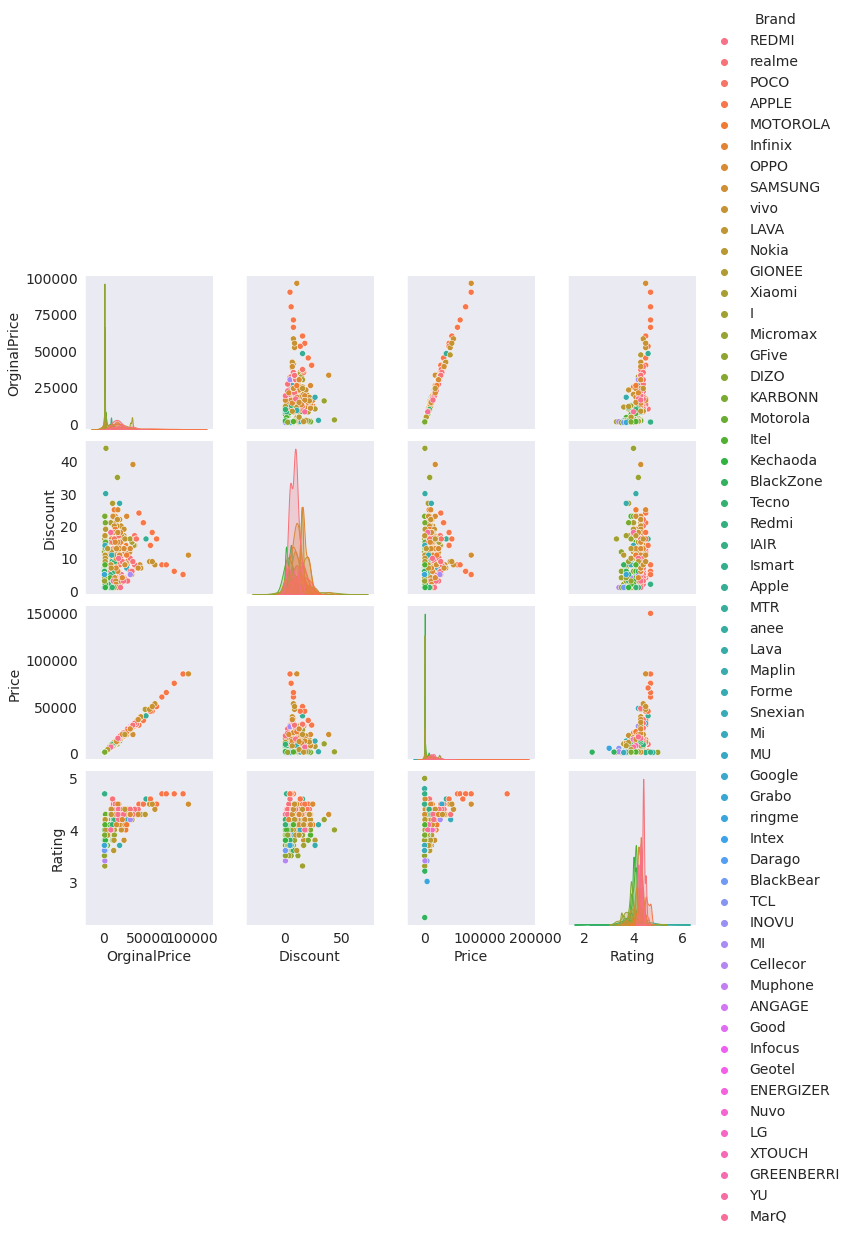

In [ ]:
sns.set_style("dark")
sns.pairplot(mobile_df, hue='Brand');

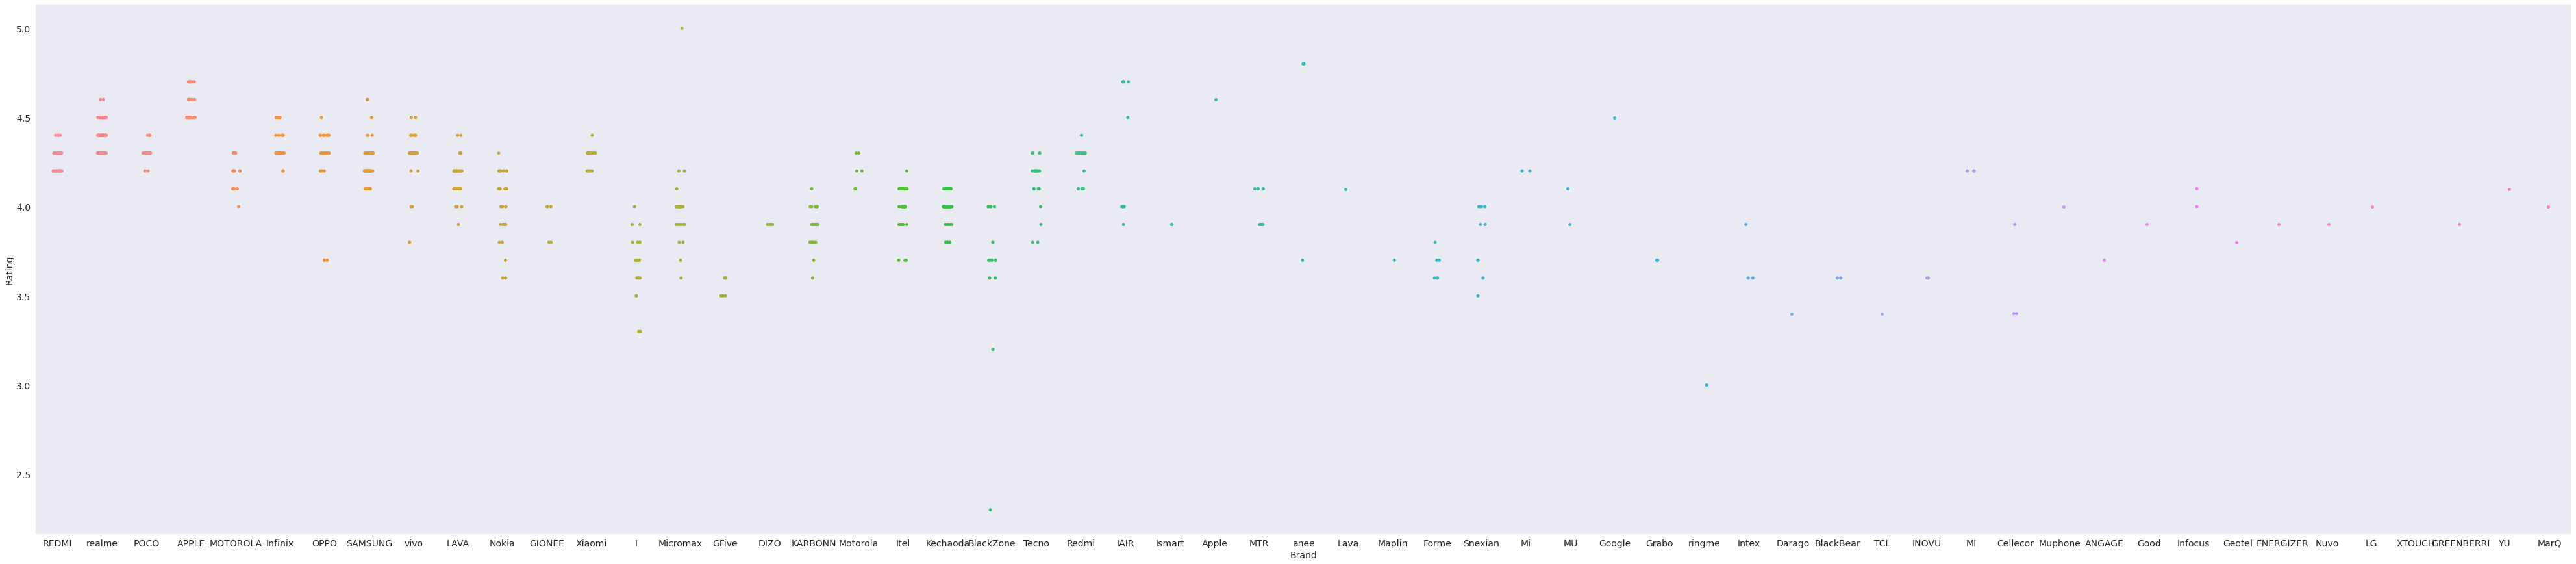

In [ ]:
fig, ax = plt.subplots(figsize=(70,15))
ax = sns.stripplot(y="Rating", x="Brand", data=mobile_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


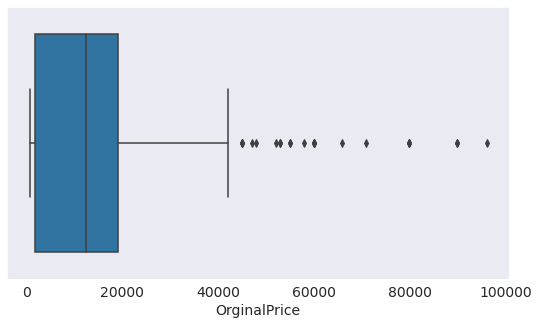

In [ ]:
sns.boxplot(mobile_df["OrginalPrice"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


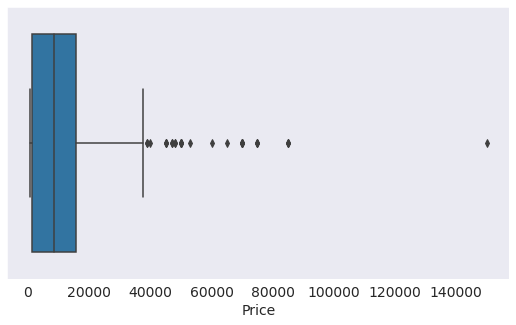

In [ ]:
sns.boxplot(mobile_df["Price"])

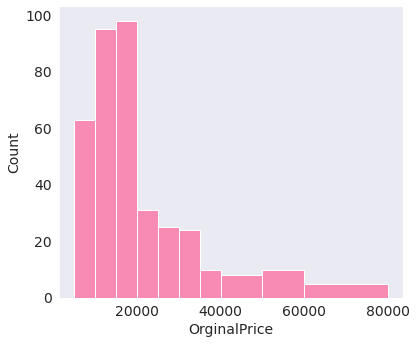

In [ ]:
sns.displot(mobile_df, x='OrginalPrice',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='#fd6c9e')

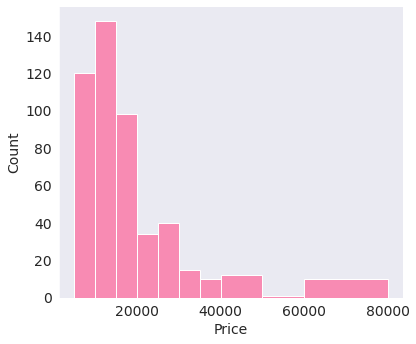

In [ ]:
sns.displot(mobile_df, x='Price',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='#fd6c9e')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

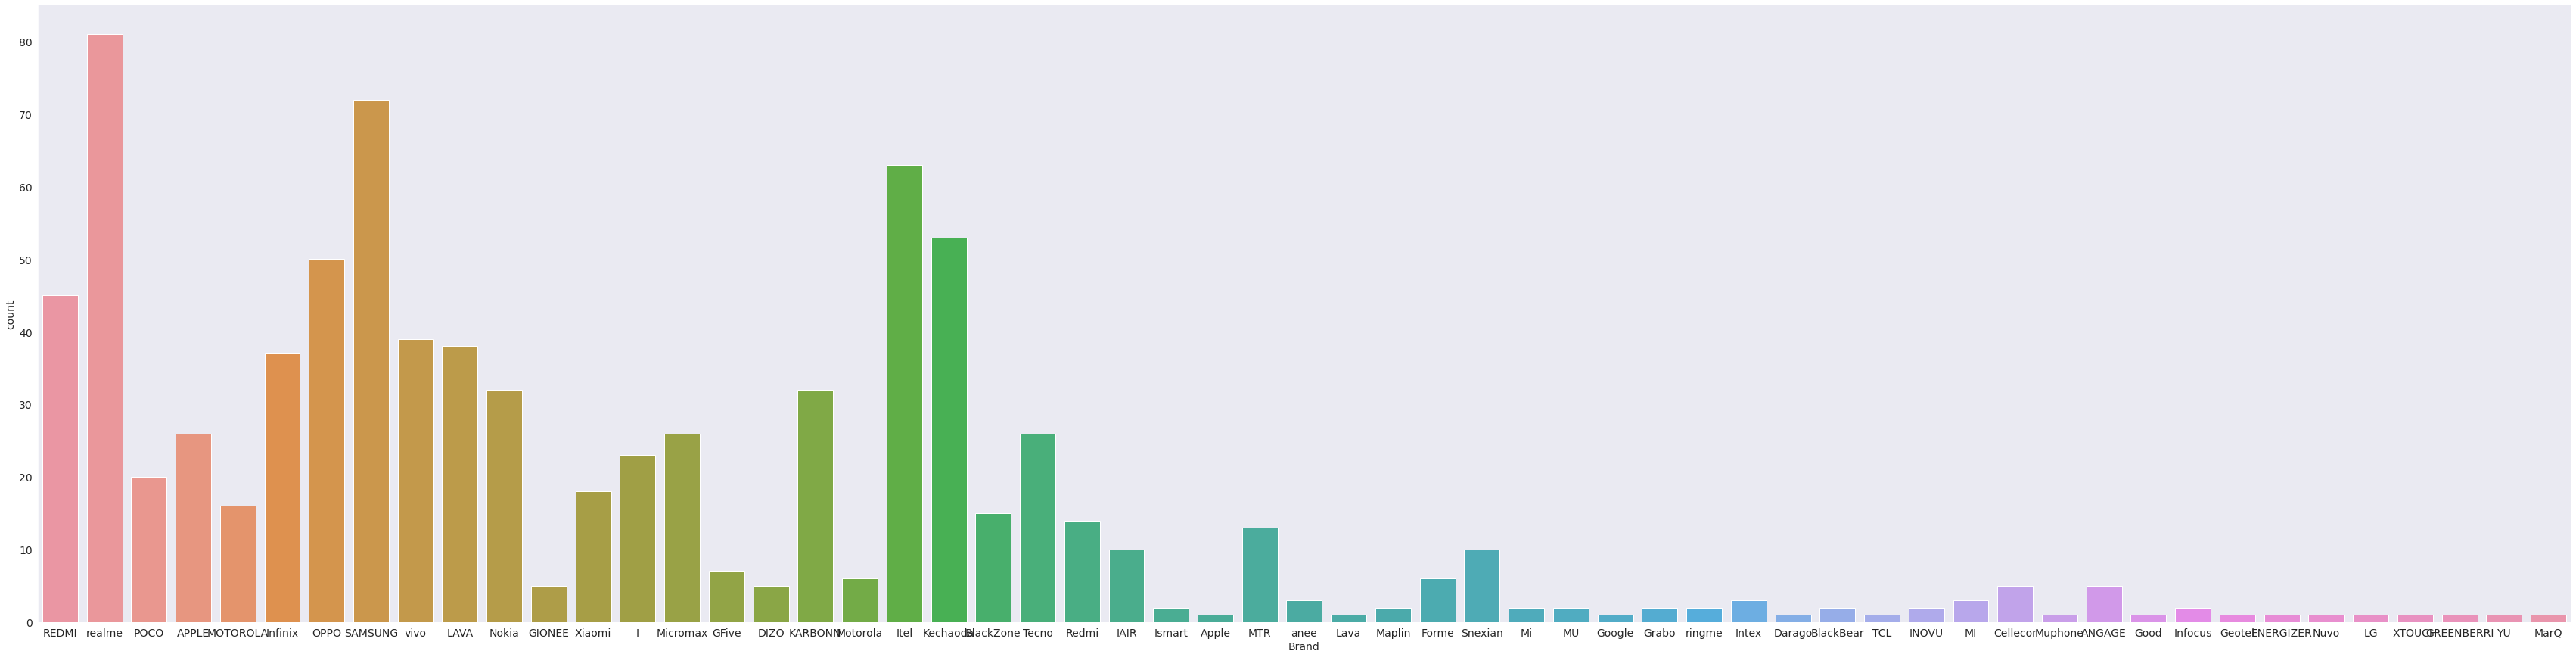

In [ ]:
plt.figure(figsize=(60,15))
sns.countplot(mobile_df.Brand)
plt.show

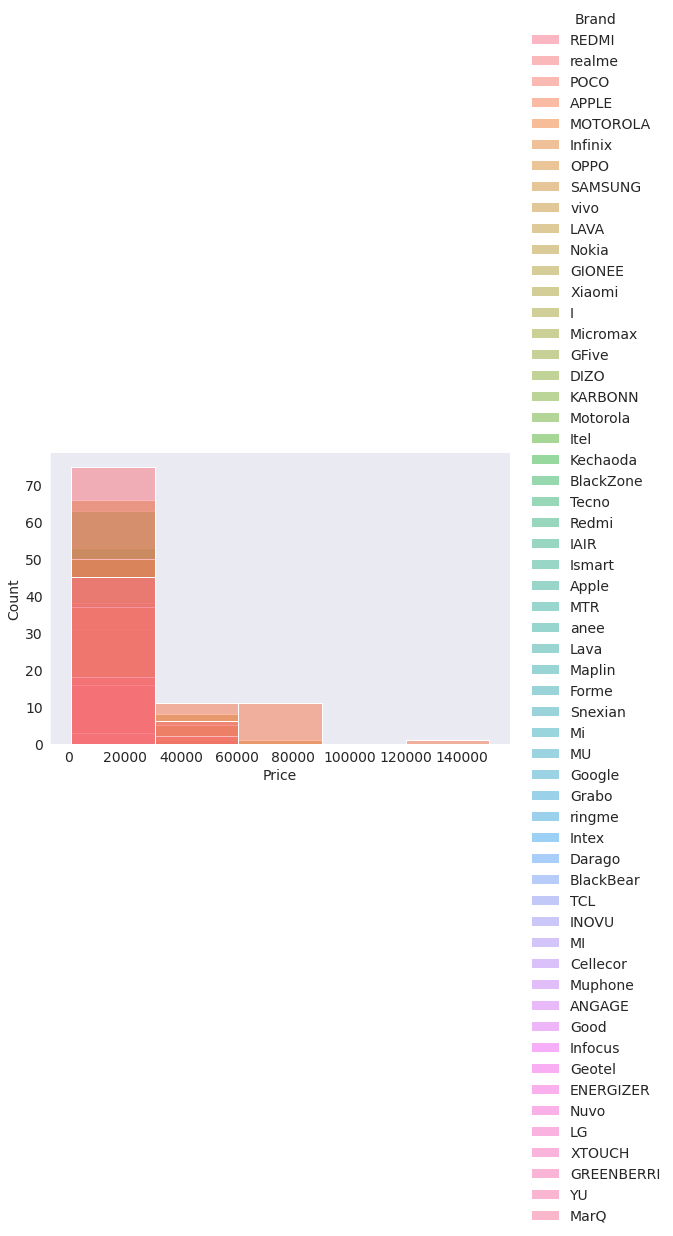

In [ ]:
#brandwise mobile phone price segments
sns.displot(mobile_df, x='Price',bins=5, hue='Brand',aspect=1.5)

In [ ]:
# Top Rated Mobiles
top_rated_phones = mobile_df.sort_values(by=["Rating"], ascending=False)[:50]
top_rated_phones

,Brand,Model,Processor,Ram,Camera,Battery,Display,OrginalPrice,Discount,Price,Rating,Warranty
341,Micromax,X413,One Year manufacturer Warranty,32 MB RAM,0.3MP Rear Camera,800 mAh Battery,4.5 cm (1.77 inch) Display,NaN,NaN,904,5.0,One Year manufacturer Warranty
718,anee,P3,12 Months Warranty,32 MB RAM,0.3MP Rear Camera,2500 mAh Battery,4.57 cm (1.8 inch) Display,NaN,NaN,790,4.8,12 Months Warranty
384,anee,P3,12 Months,32 MB RAM,0.3MP Rear Camera,2500 mAh Battery,4.57 cm (1.8 inch) Display,NaN,NaN,790,4.8,12 Months
642,APPLE,"iPhone 13 (Blue, 128 GB)",Brand Warranty for 1 Year,128 GB RO,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,15.49 cm (6.1 inch) Super Retina XDR Display,79900.0,6.0,74900,4.7,Brand Warranty for 1 Year
346,APPLE,"iPhone 12 (Blue, 128 GB)",Ceramic Shield,128 GB RO,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,15.49 cm (6.1 inch) Super Retina XDR Display,70900.0,8.0,64999,4.7,Brand Warranty for 1 Year
625,APPLE,"iPhone 13 ((PRODUCT)RED, 256 GB)",Brand Warranty for 1 Year,256 GB RO,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,15.49 cm (6.1 inch) Super Retina XDR Display,89900.0,5.0,84900,4.7,Brand Warranty for 1 Year
69,APPLE,"iPhone 12 (Black, 64 GB)",Ceramic Shield,64 GB RO,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,15.49 cm (6.1 inch) Super Retina XDR Display,65900.0,8.0,60199,4.7,Brand Warranty for 1 Year
757,APPLE,"iPhone 13 (Starlight, 256 GB)",Brand Warranty for 1 Year,256 GB RO,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,15.49 cm (6.1 inch) Super Retina XDR Display,89900.0,5.0,84900,4.7,Brand Warranty for 1 Year
776,IAIR,D24,1 Year manufacturer warranty for device and 6 ...,32 MB RAM,0.8MP Rear Camera,1200 mAh Battery,4.5 cm (1.77 inch) NA Display,NaN,NaN,1025,4.7,1 Year manufacturer warranty for device and 6 ...
506,IAIR,D24,1 Year manufacturer warranty for device and 6 ...,32 MB RAM,0.8MP Rear Camera,1200 mAh Battery,4.5 cm (1.77 inch) NA Display,1025.0,2.0,999,4.7,1 Year manufacturer warranty for device and 6 ...


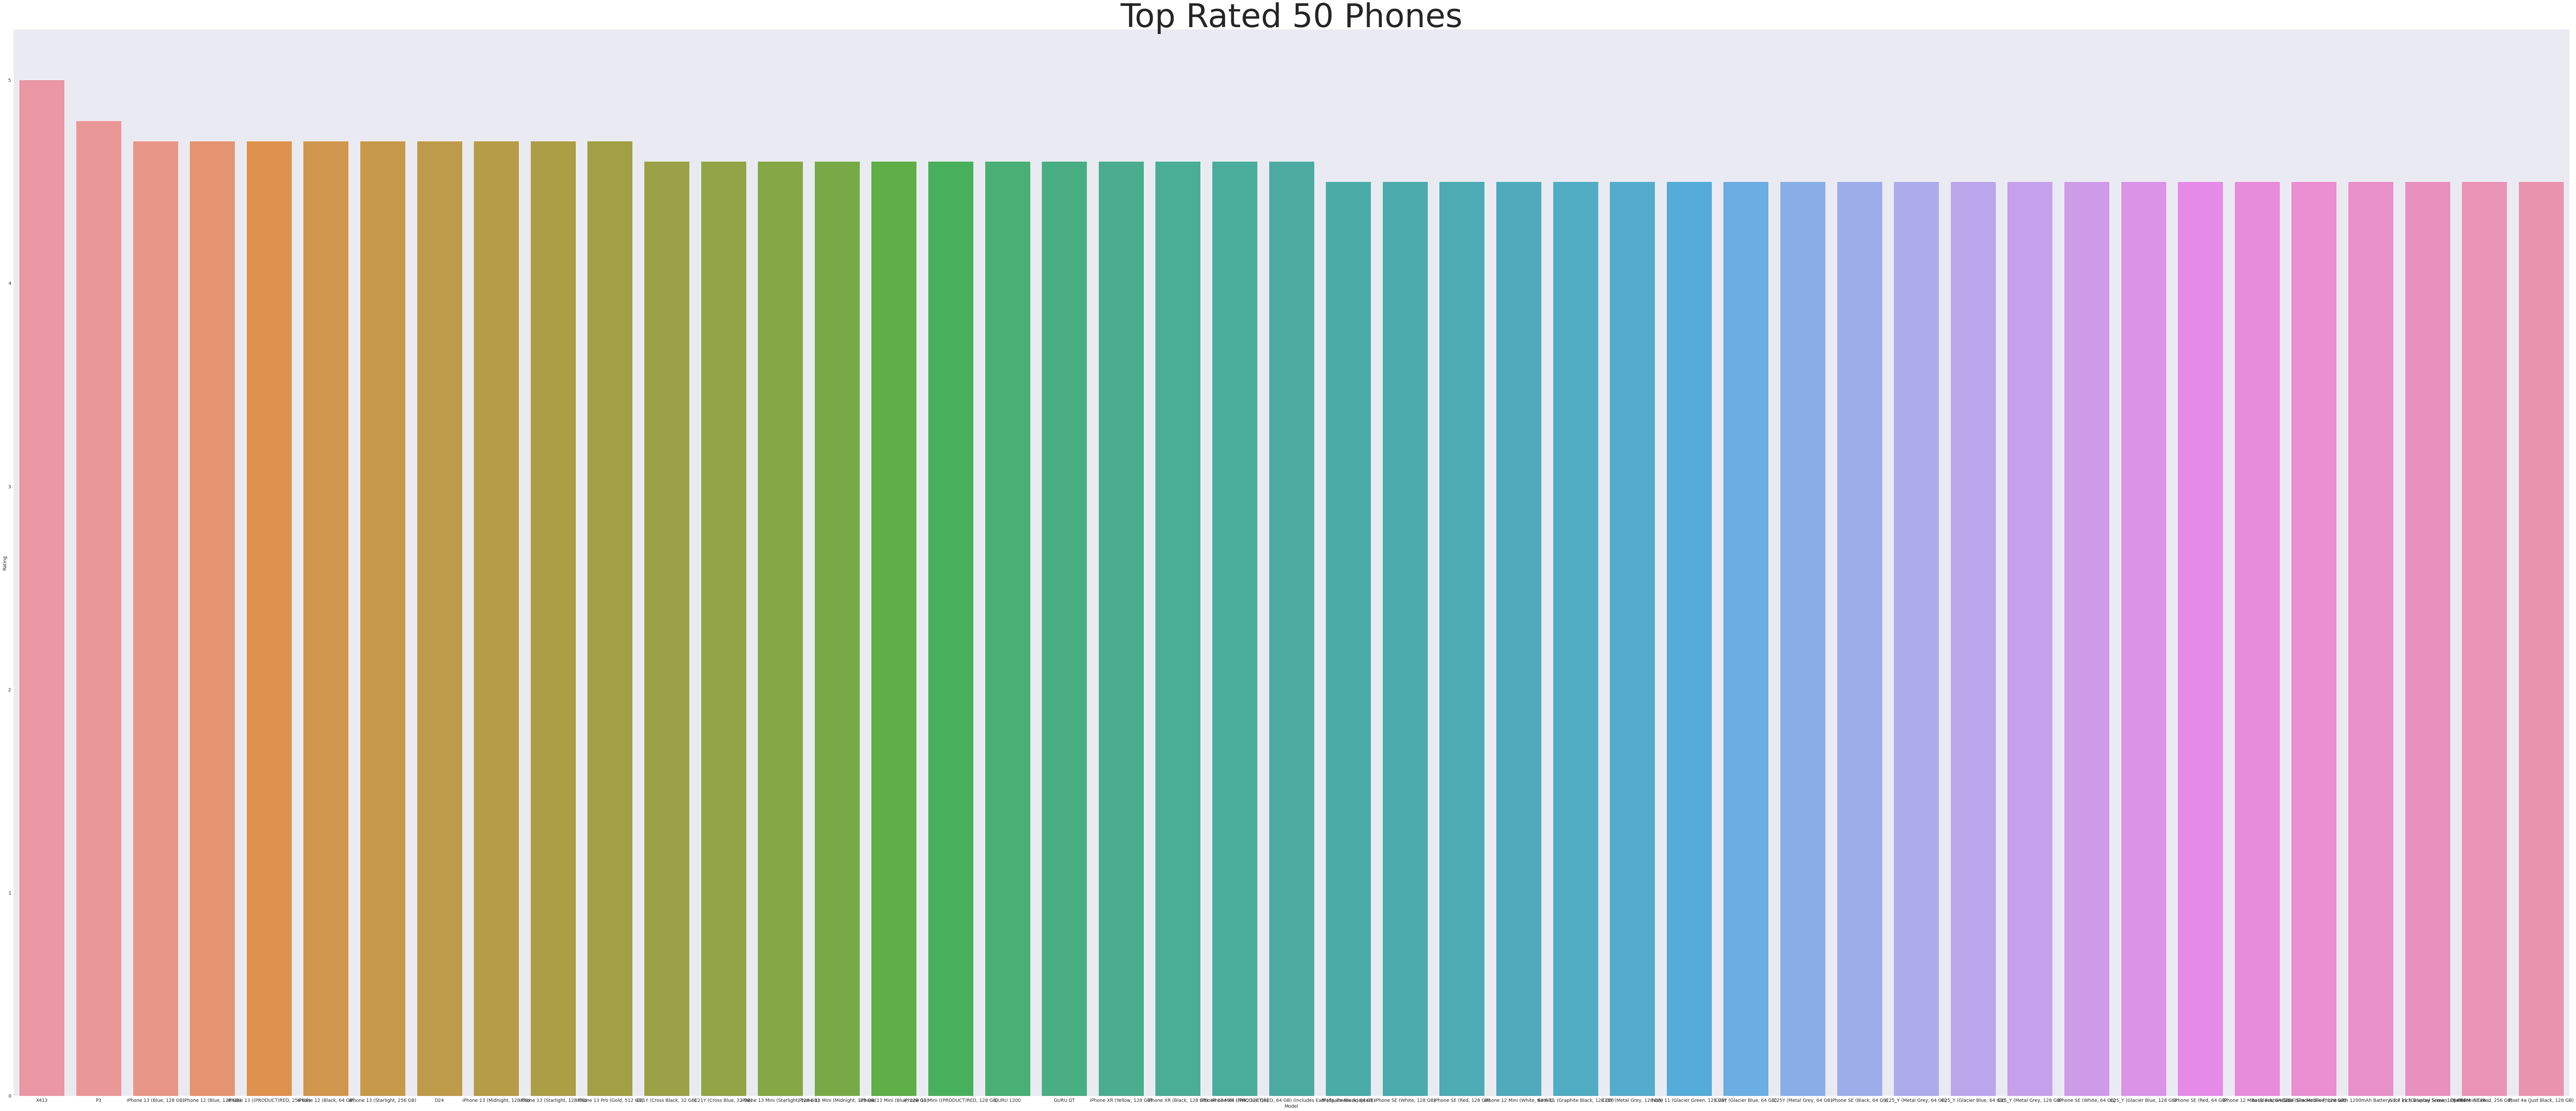

In [ ]:
plt.figure(figsize=(140,60))
sns.barplot(x=top_rated_phones.Model, y=mobile_df.Rating)
plt.title("Top Rated 50 Phones", size=100)
plt.show()

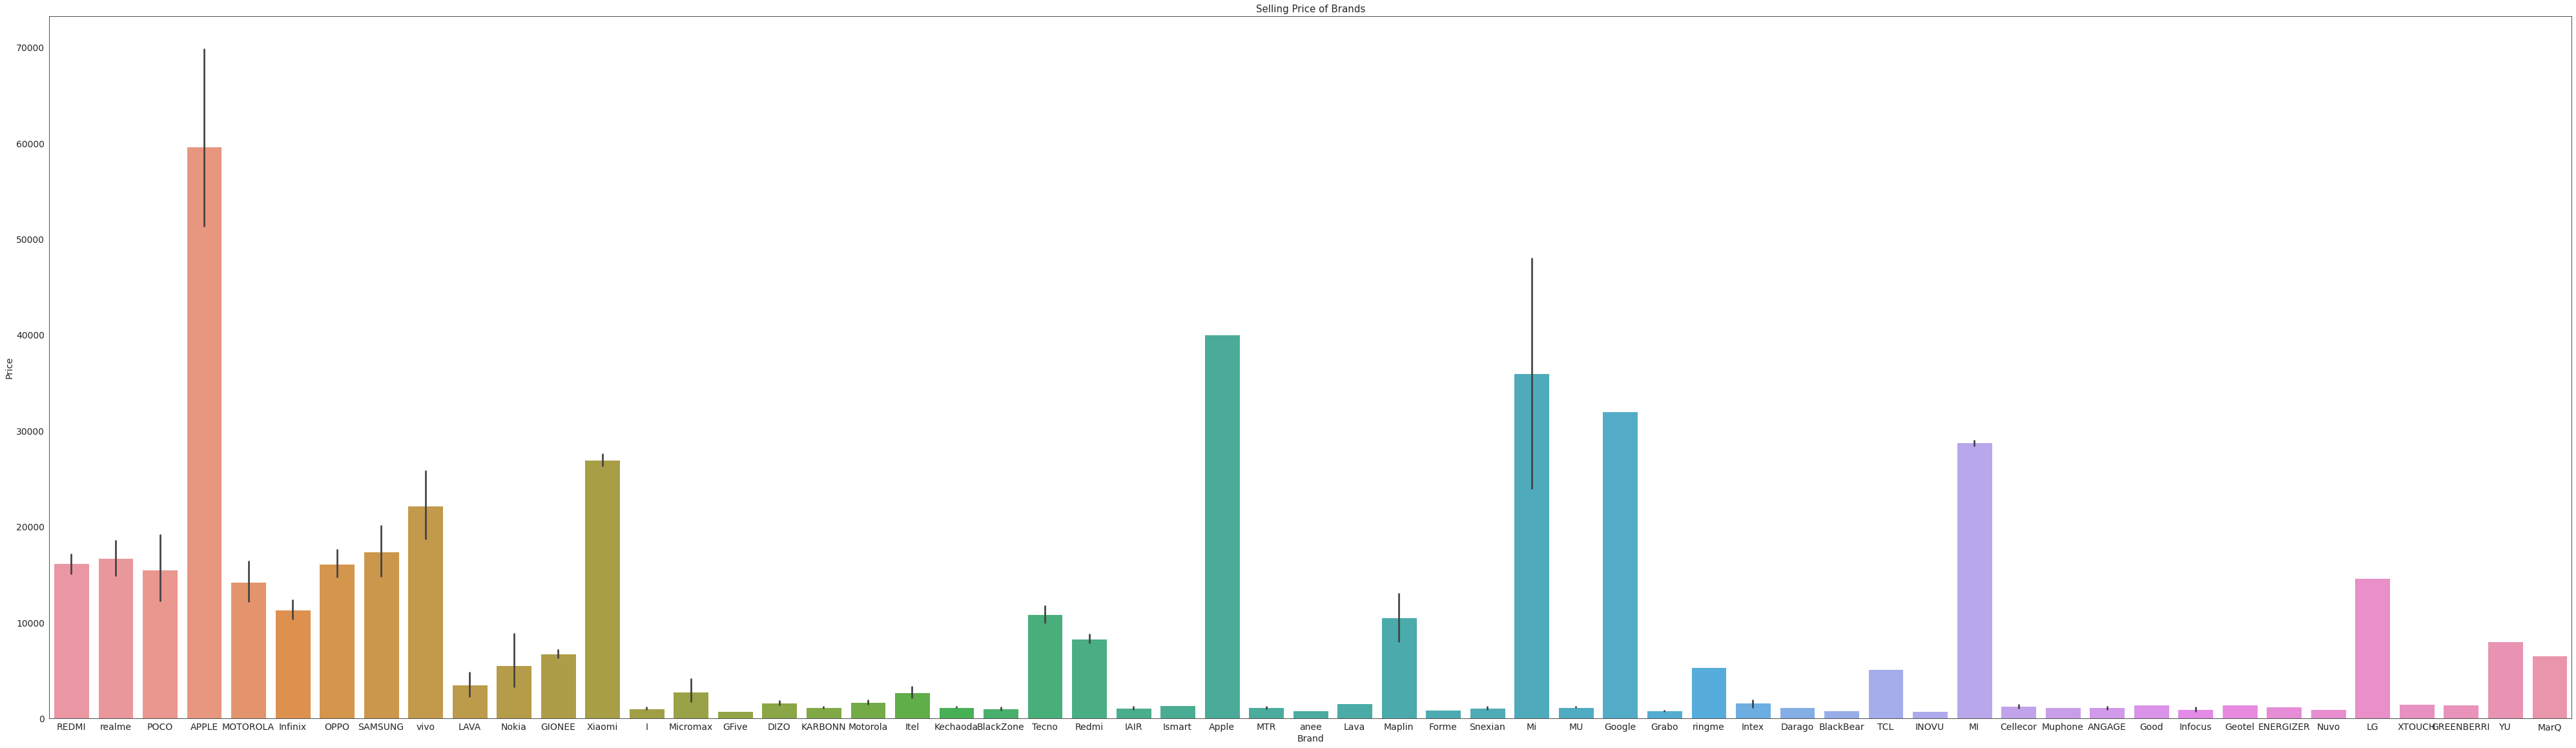

In [62]:
# Selling Price of Brands
plt.figure(figsize=(70,20))
sns.barplot(x=mobile_df.Brand, y=mobile_df["Price"])
plt.title("Selling Price of Brands", size=15)
plt.show()

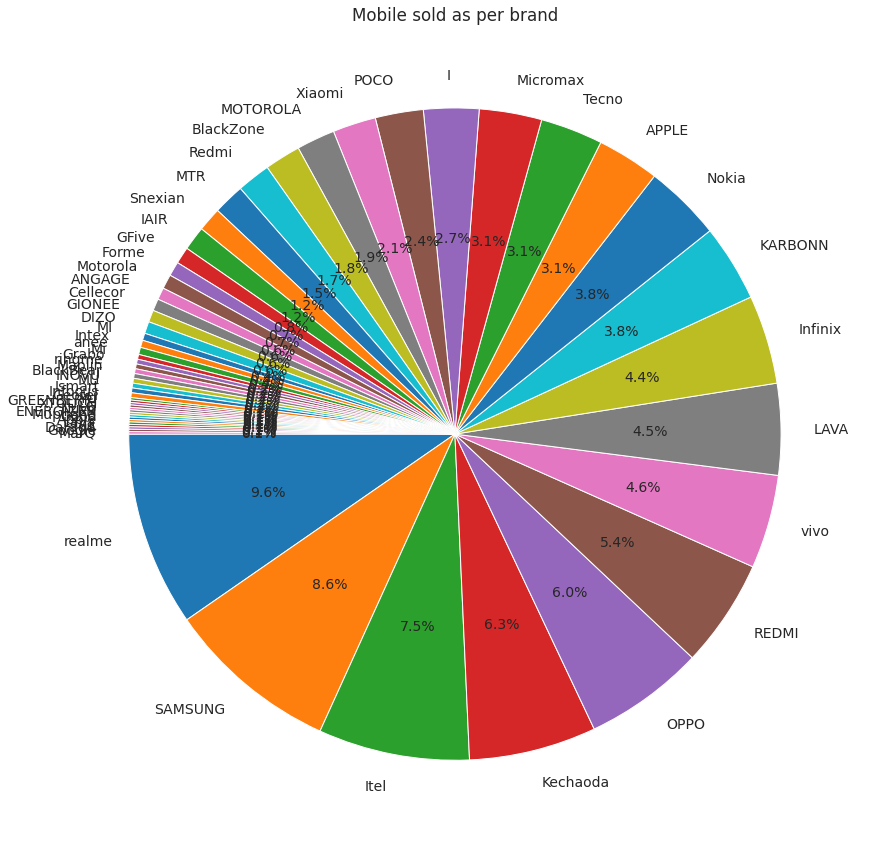

In [ ]:
Brand_counts = mobile_df.Brand.value_counts()
Brand_counts
plt.figure(figsize=(80,15))
plt.title('Mobile sold as per brand')
plt.pie(Brand_counts, labels=Brand_counts.index, autopct='%1.1f%%', startangle=180);

the percentage of mobile phones sold realme have the highest market share followed by samsung

### The average selling price of realme mobile phone

In [ ]:
#Mean of Selling prices
mobile_df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

Brand
APPLE         59603.269231
Apple         39999.000000
Mi            35999.000000
Google        31999.000000
MI            28778.333333
Xiaomi        26913.000000
vivo          22145.871795
SAMSUNG       17346.472222
realme        16692.814815
REDMI         16134.288889
OPPO          16105.160000
POCO          15474.000000
LG            14600.000000
MOTOROLA      14230.250000
Infinix       11336.594595
Tecno         10825.384615
Maplin        10494.500000
Redmi          8266.571429
YU             7999.000000
GIONEE         6699.000000
MarQ           6499.000000
Nokia          5507.468750
ringme         5299.000000
TCL            5120.000000
LAVA           3496.815789
Micromax       2743.769231
Itel           2698.444444
Motorola       1699.000000
Intex          1623.000000
DIZO           1595.200000
Lava           1521.000000
XTOUCH         1499.000000
Geotel         1399.000000
GREENBERRI     1399.000000
Good           1390.000000
Ismart         1324.000000
Cellecor       1238.40

### Total models of realme Brand

In [ ]:
top_realme_model = mobile_df.Model.value_counts().head(25)
top_realme_model

K115                               8
K33                                6
A27                                5
S600                               5
Rock                               4
K28                                4
Muzik 400 Core                     4
VIBE                               4
S19                                4
Ace Young Without Charger          4
IT2163                             4
K9                                 4
K66 Plus                           4
EVEREST                            4
A26                                4
3310 DS 2020                       4
ECO X                              4
D24                                4
Power 410                          3
KX3                                3
Power 100 New                      3
KX 10i                             3
Note 10S (Shadow Black, 128 GB)    3
K310i                              3
Narzo 30 (Racing Silver, 64 GB)    3
Name: Model, dtype: int64

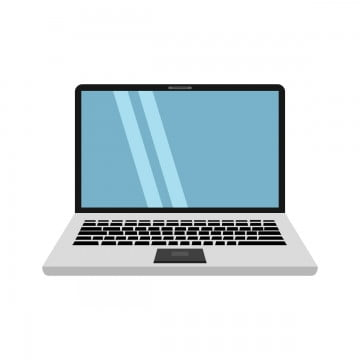
# ***Laptop***

In [19]:
Laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    854 non-null    int64  
 1   Brand         854 non-null    object 
 2   Model         854 non-null    object 
 3   Processor     792 non-null    object 
 4   Ram           854 non-null    object 
 5   OS            748 non-null    object 
 6   Storage       835 non-null    object 
 7   OrginalPrice  805 non-null    object 
 8   Discount      792 non-null    object 
 9   Price         854 non-null    object 
 10  Rating        603 non-null    float64
dtypes: float64(1), int64(1), object(9)
memory usage: 73.5+ KB


## Data Cleaning

In [20]:
del Laptop_df['Unnamed: 0']
Laptop_df.head()

,Brand,Model,Processor,Ram,OS,Storage,OrginalPrice,Discount,Price,Rating
0,['Nokia'],Nokia PureBook S14 Core i5 10th Gen - (8 GB/51...,['Intel Core i5 Processor'],['8 GB DDR4 RAM'],['64 bit Windows 10 Operating System'],['512 GB SSD'],"₹74,990",32% off,"₹50,990",5.0
1,['Nokia'],Nokia PureBook S14 Core i5 11th Gen - (8 GB/51...,['Intel Core i5 Processor'],['8 GB DDR4 RAM'],['64 bit Windows 11 Operating System'],['512 GB SSD'],"₹82,990",36% off,"₹52,790",NaN
2,['DELL'],DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,['AMD Athlon Dual Core Processor'],['4 GB DDR4 RAM'],['64 bit Windows 11 Operating System'],['256 GB SSD'],"₹42,210",29% off,"₹29,890",4.2
3,['Lenovo'],Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,['Intel Core i3 Processor'],['8 GB DDR4 RAM'],['64 bit Windows 11 Operating System'],['512 GB SSD'],"₹64,490",35% off,"₹41,490",4.2
4,['HP'],HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,['Intel Core i3 Processor'],['8 GB DDR4 RAM'],['64 bit Windows 11 Operating System'],['512 GB SSD'],"₹49,590",11% off,"₹43,990",4.5


In [21]:
Laptop_df["Brand"] = Laptop_df["Brand"].str.replace("^\['|'\]$","")
Laptop_df["Processor"] = Laptop_df["Processor"].str.replace("^\['|'\]$","")
Laptop_df["Ram"] = Laptop_df["Ram"].str.replace("^\['|'\]$","")
Laptop_df["OS"] = Laptop_df["OS"].str.replace("^\['|'\]$","")
Laptop_df["Storage"] = Laptop_df["Storage"].str.replace("^\['|'\]$","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [22]:
Laptop_df.head()

,Brand,Model,Processor,Ram,OS,Storage,OrginalPrice,Discount,Price,Rating
0,Nokia,Nokia PureBook S14 Core i5 10th Gen - (8 GB/51...,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,"₹74,990",32% off,"₹50,990",5.0
1,Nokia,Nokia PureBook S14 Core i5 11th Gen - (8 GB/51...,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,"₹82,990",36% off,"₹52,790",NaN
2,DELL,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,"₹42,210",29% off,"₹29,890",4.2
3,Lenovo,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,"₹64,490",35% off,"₹41,490",4.2
4,HP,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,"₹49,590",11% off,"₹43,990",4.5


In [23]:
#Removing ₹ from originalPrice, discountedPrice
Laptop_df['OrginalPrice'] = pd.to_numeric(Laptop_df['OrginalPrice'].replace('[^0-9\.-]', "", regex=True))
Laptop_df['Price'] = pd.to_numeric(Laptop_df['Price'].replace('[^0-9\.-]', "", regex=True))
Laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         854 non-null    object 
 1   Model         854 non-null    object 
 2   Processor     792 non-null    object 
 3   Ram           854 non-null    object 
 4   OS            748 non-null    object 
 5   Storage       835 non-null    object 
 6   OrginalPrice  805 non-null    float64
 7   Discount      792 non-null    object 
 8   Price         854 non-null    int64  
 9   Rating        603 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 66.8+ KB


In [24]:
Laptop_df['Discount'] = pd.to_numeric(Laptop_df['Discount'].replace("[^0-9]", "", regex=True))
Laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         854 non-null    object 
 1   Model         854 non-null    object 
 2   Processor     792 non-null    object 
 3   Ram           854 non-null    object 
 4   OS            748 non-null    object 
 5   Storage       835 non-null    object 
 6   OrginalPrice  805 non-null    float64
 7   Discount      792 non-null    float64
 8   Price         854 non-null    int64  
 9   Rating        603 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 66.8+ KB


In [25]:
Laptop_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OrginalPrice,805.0,93582.551553,45401.741108,19999.0,64290.00,82990.0,115900.0,377798.0
Discount,792.0,20.268939,9.622306,1.0,14.00,21.0,26.0,53.0
Price,854.0,74525.718970,37576.577695,13990.0,50990.00,64990.0,89999.0,345390.0
Rating,603.0,4.311443,0.486753,1.6,4.15,4.4,4.6,5.0


In [26]:
Laptop_df.head()

,Brand,Model,Processor,Ram,OS,Storage,OrginalPrice,Discount,Price,Rating
0,Nokia,Nokia PureBook S14 Core i5 10th Gen - (8 GB/51...,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,74990.0,32.0,50990,5.0
1,Nokia,Nokia PureBook S14 Core i5 11th Gen - (8 GB/51...,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,82990.0,36.0,52790,NaN
2,DELL,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,42210.0,29.0,29890,4.2
3,Lenovo,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,64490.0,35.0,41490,4.2
4,HP,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,49590.0,11.0,43990,4.5


In [27]:
Laptop_df.sample(15)

,Brand,Model,Processor,Ram,OS,Storage,OrginalPrice,Discount,Price,Rating
361,ASUS,ASUS VivoBook Ultra 14 Core i5 11th Gen - (8 G...,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,73990.0,23.0,56590,4.5
657,Lenovo,Lenovo Yoga Core i7 10th Gen - (16 GB/1 TB SSD...,Intel Core i7 Processor,16 GB LPDDR4X RAM,64 bit Windows 10 Operating System,1 TB SSD,148082.0,18.0,119990,2.5
769,HP,HP 15q APU Dual Core A9 A9-9425 - (4 GB/1 TB H...,AMD APU Dual Core A9 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,NaN,NaN,31414,4.1
648,Avita,Avita Liber Core i5 8th Gen - (8 GB/512 GB SSD...,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,76990.0,5.0,73063,3.4
380,ASUS,ASUS Pentium Quad Core - (4 GB/1 TB HDD/Window...,Intel Pentium Quad Core Processor,4 GB LPDDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,NaN,NaN,33990,NaN
80,DELL,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,54517.0,24.0,41290,4.0
436,Lenovo,Lenovo Core i3 10th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor,8 GB DDR4 RAM,NaN,256 GB SSD,49990.0,16.0,41990,NaN
199,Nokia,Nokia PureBook S14 Core i5 11th Gen - (8 GB/51...,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,82990.0,36.0,52790,NaN
16,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,50990.0,19.0,40990,4.3
731,MSI,MSI Pulse GL66 Core i7 11th Gen - (16 GB/1 TB ...,NaN,16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,139990.0,14.0,119990,4.6


In [28]:
Laptop_df['Brand'].groupby(Laptop_df['Brand']).count().sort_values(ascending=False)

Brand
ASUS         189
MSI          134
Lenovo       130
DELL         125
HP           111
Nokia         74
acer          35
Avita         18
APPLE         16
Infinix        5
Vaio           4
ALIENWARE      3
MICROSOFT      2
LG             2
Nexstgo        1
Mi             1
RedmiBook      1
Smartron       1
iball          1
realme         1
Name: Brand, dtype: int64

In [29]:
Laptop_df['Brand'].groupby(Laptop_df['Ram']).count().sort_values(ascending=False)

Ram
8 GB DDR4 RAM                                                                                                 481
16 GB DDR4 RAM                                                                                                221
4 GB DDR4 RAM                                                                                                  63
16 GB LPDDR4X RAM                                                                                              23
8 GB LPDDR4X RAM                                                                                               20
4 GB LPDDR4 RAM                                                                                                 8
8 GB DDR3 RAM                                                                                                   7
16 GB LPDDR3 RAM                                                                                                6
8 GB LPDDR3 RAM                                                                     

In [30]:
total_sales = Laptop_df.Price.sum()
total_sales

63644964

## Exploratory Analysis and Visualization

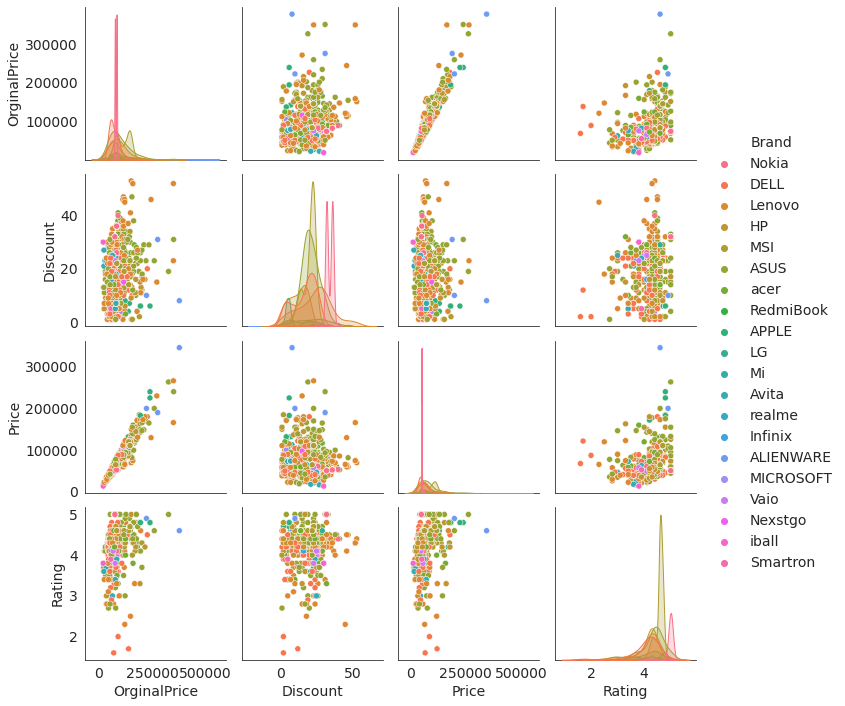

In [31]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style("white")
sns.pairplot(Laptop_df, hue='Brand');

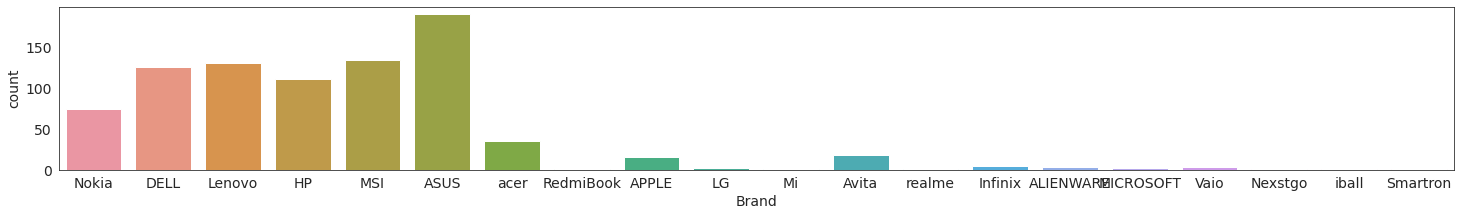

In [32]:
#Showing the counts of Laptops per brand
fig, ax = plt.subplots(figsize=(25,3))
ax=sns.countplot(x="Brand", data=Laptop_df)

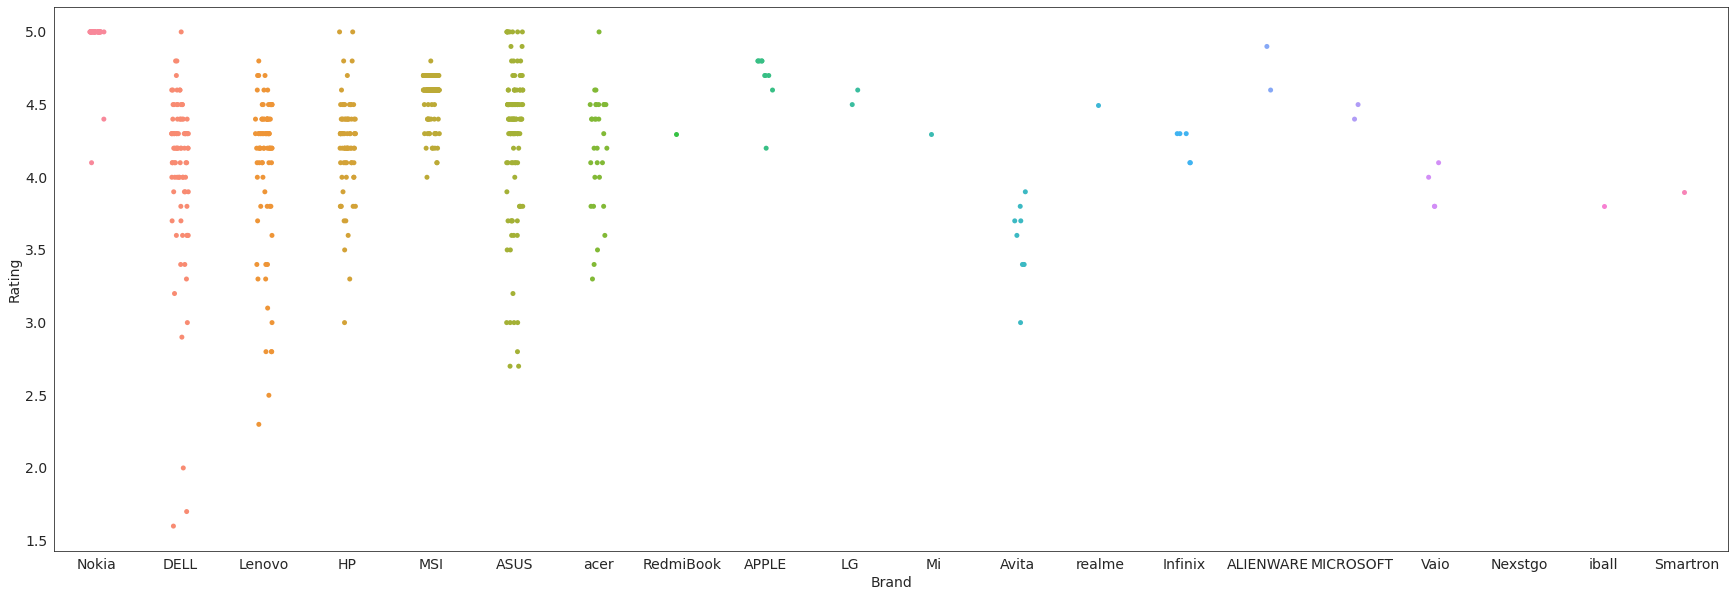

In [35]:
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.stripplot(y="Rating", x="Brand", data=Laptop_df)

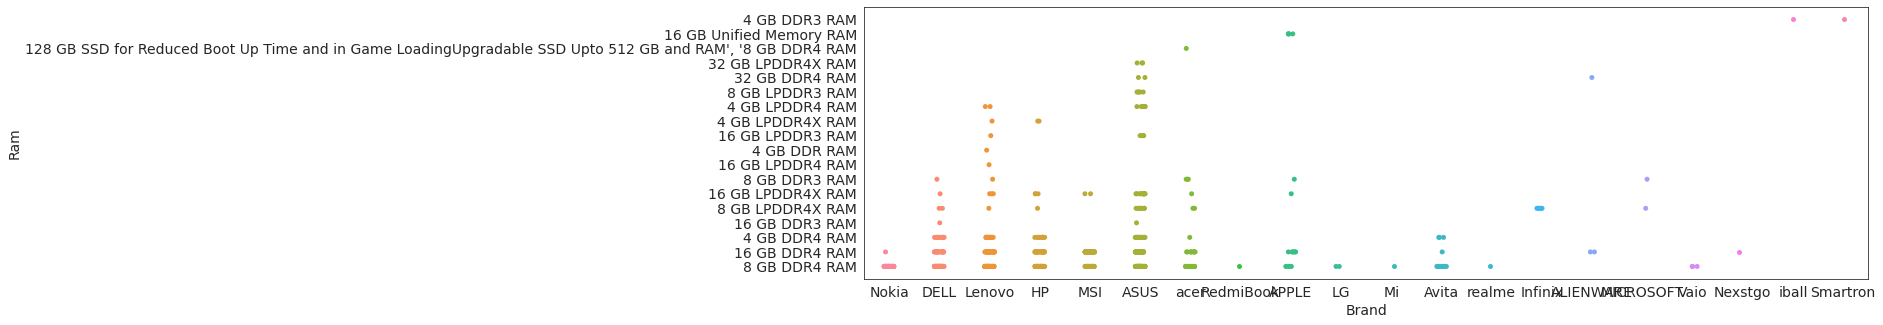

In [36]:
fig, ax = plt.subplots(figsize=(18,5))
ax = sns.stripplot(y="Ram", x="Brand", data=Laptop_df)

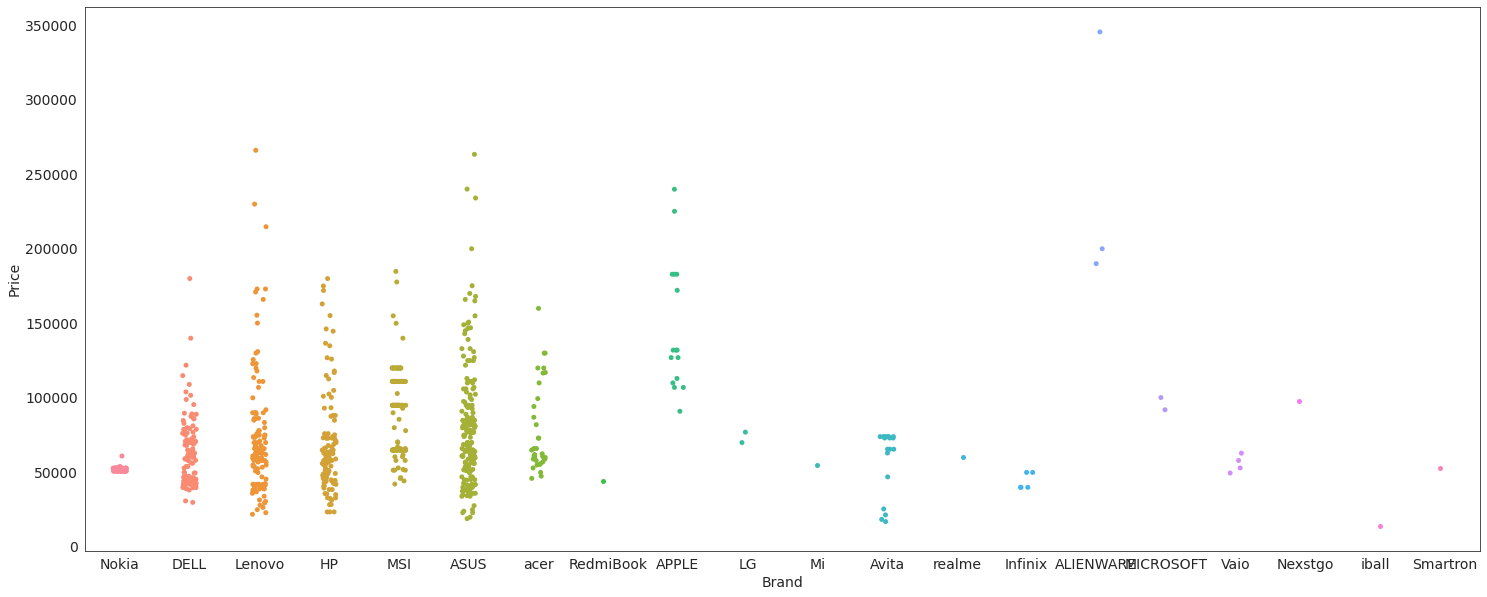

In [38]:
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.stripplot(y="Price", x="Brand", data=Laptop_df)

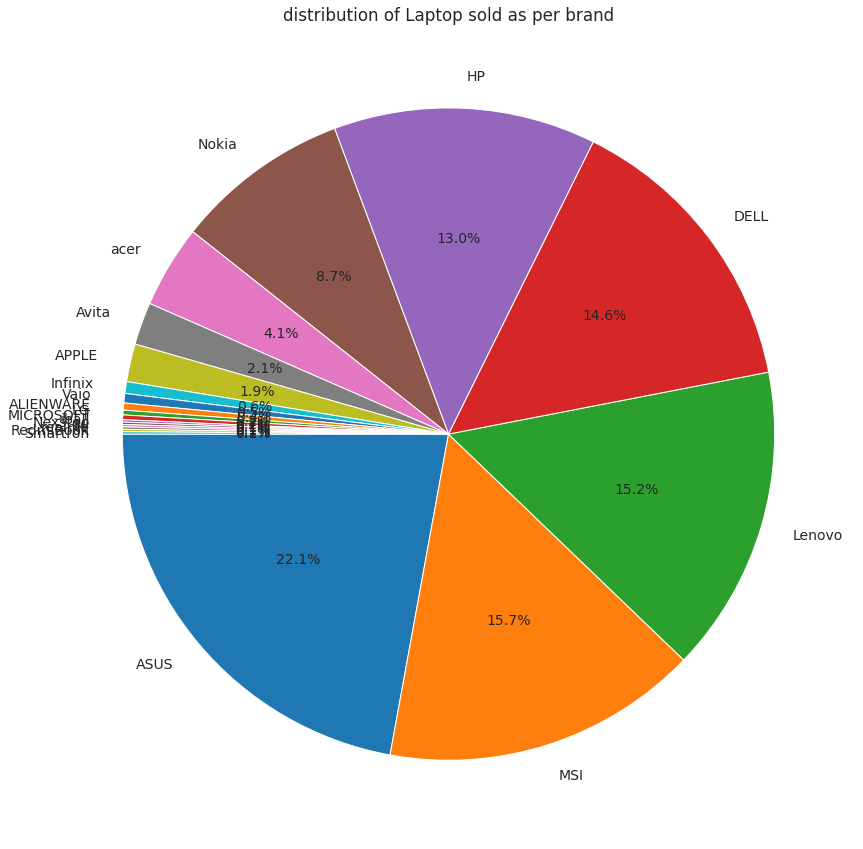

In [39]:
Brand_counts = Laptop_df.Brand.value_counts()
Brand_counts
plt.figure(figsize=(50,15))
plt.title('distribution of Laptop sold as per brand')
plt.pie(Brand_counts, labels=Brand_counts.index, autopct='%1.1f%%', startangle=180);

### The average selling price of ASUS Laptops


In [40]:
Laptop_df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

Brand
ALIENWARE    245123.333333
APPLE        147727.500000
Nexstgo       97990.000000
MICROSOFT     96094.500000
MSI           90756.410448
ASUS          78628.455026
acer          78029.400000
LG            73490.000000
Lenovo        72842.661538
HP            69242.387387
DELL          61020.024000
realme        59990.000000
Avita         58457.611111
Vaio          55865.000000
Mi            54999.000000
Smartron      52990.000000
Nokia         52041.351351
RedmiBook     43999.000000
Infinix       43990.000000
iball         13990.000000
Name: Price, dtype: float64

In [41]:
top_Laptop_model = Laptop_df.Model.value_counts().head(15)
top_Laptop_model

Nokia PureBook S14 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home) NKi510TL85S Thin and Light Lap...    36
Nokia PureBook S14 Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) NKi511TL85S Thin and Light Lap...    36
MSI Bravo Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/AMD Radeon RX5500M/...    35
MSI Alpha 15 Ryzen 7 Octa Core 5800H - (16 GB/1 TB SSD/Windows 10 Home/8 GB Graphics/AMD Radeon RX6600...    34
MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce RTX 30...    15
MSI Pulse GL66 Core i7 11th Gen - (16 GB/1 TB SSD/Windows 10 Home/6 GB Graphics/NVIDIA GeForce RTX 306...    14
MSI GF65 Thin Core i7 10th Gen - (16 GB/1 TB SSD/Windows 10 Home/6 GB Graphics/NVIDIA GeForce RTX 3060...     4
Lenovo IdeaPad Gaming 3 Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeFor...     3
Infinix INBook X1 Core i3 10th Gen - (8 GB/256 GB SSD/Windows 11 Home) XL11 Thin and Light Laptop       

In [42]:
top_DiscountLaptop_model = Laptop_df.Discount.value_counts().head(15)
top_DiscountLaptop_model

23.0    69
22.0    57
19.0    50
32.0    46
36.0    38
14.0    34
24.0    32
16.0    30
18.0    29
20.0    29
17.0    27
26.0    25
29.0    19
21.0    19
11.0    18
Name: Discount, dtype: int64

# ***Both Mobile and Laptop***

In [57]:
x=['Mobiles','Laptops']
y=[mobile_df['Discount'].mean(),Laptop_df['Discount'].mean()]

In [58]:
fig = go.Figure(data=[go.Bar(x=x, y=y)])

fig.update_traces(marker_color='rgb(255,160,122)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Discounts')
fig.show()

In [61]:
features=['Price','OrginalPrice','Discount']
fig = go.Figure(data=[
    go.Bar(name='Mobile', x=features, y=[mobile_df['Price'].mean()
                                                  ,mobile_df['OrginalPrice'].mean()
                                                 ,mobile_df['Discount'].mean()]),
    go.Bar(name='Laptop', x=features, y=[Laptop_df['Price'].mean()
                                                  ,Laptop_df['OrginalPrice'].mean()
                                                 ,Laptop_df['Discount'].mean()])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()